In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\VINAYAK\Projects\Insurance_Premium_Prediction\insurance\artifact\data_ingestion\2022-12-06-23-47-47\raw_data\insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
# cheacking null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Figure size 600x1200 with 0 Axes>

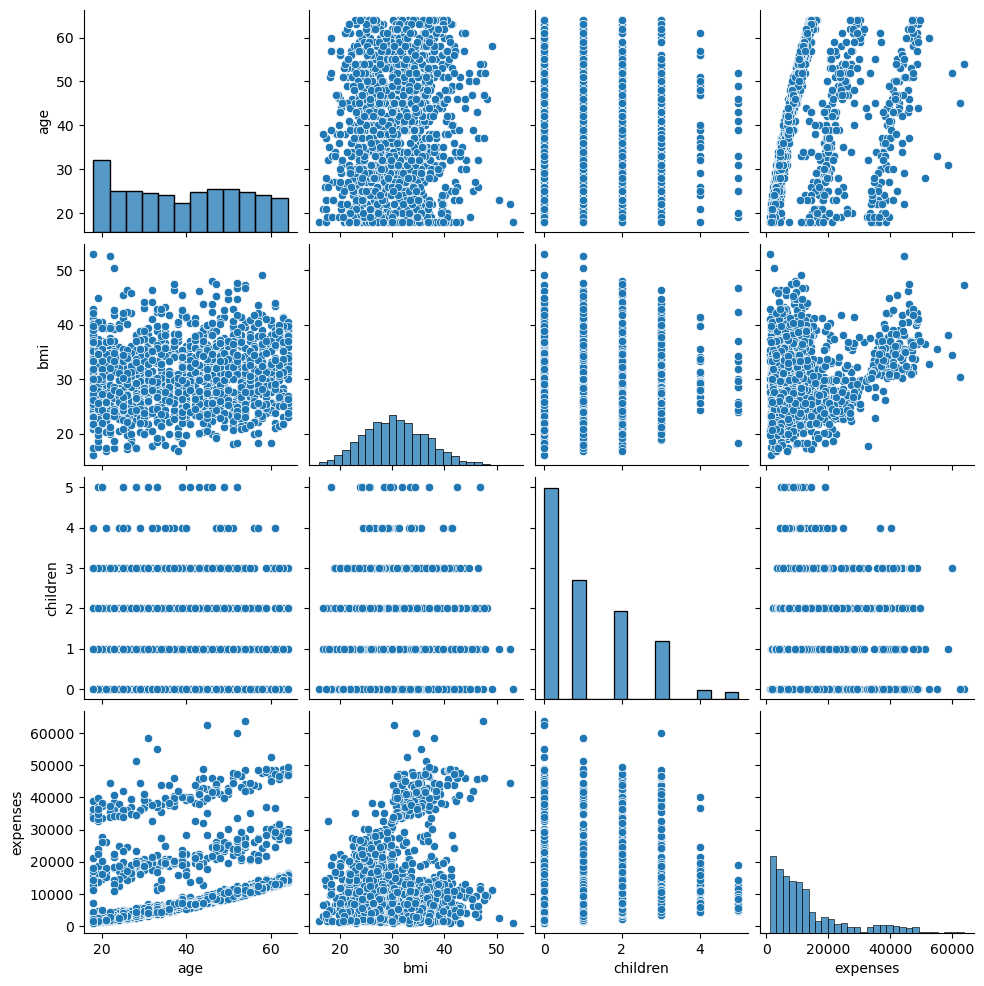

In [14]:
# Visualising all numeric variable

plt.figure(figsize=(6,12))
sns.pairplot(df)
plt.show()

In [15]:
# correlation
corr = df.corr()
corr


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<AxesSubplot:>

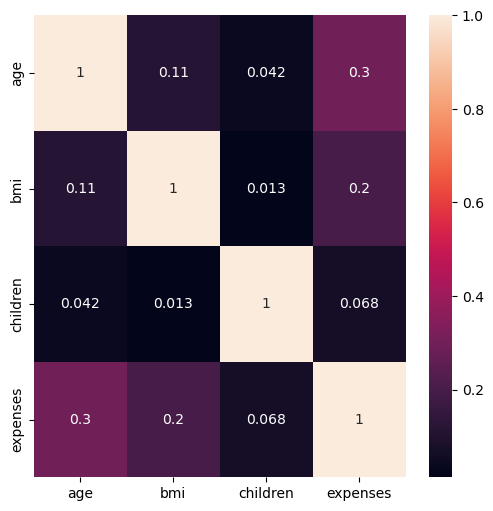

In [16]:
#Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)

In [19]:
#Duplicate values
df.duplicated().sum()

1

In [20]:
# remove Duplicate Values
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [41]:
#Categorical features and unique values
for i in df.columns:
    if df[i].dtype ==object:
        print(i,df[i].unique())
        

sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


c:\Users\VINAYAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

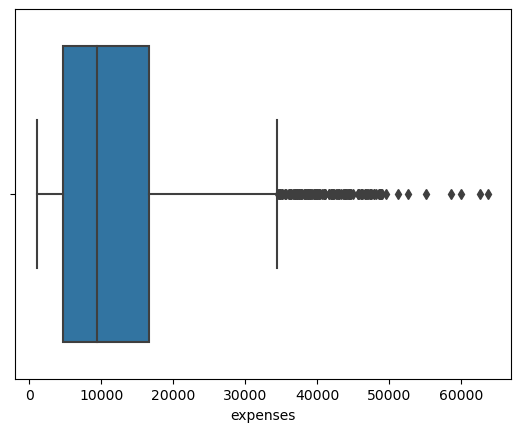

In [44]:
sns.boxplot(df['expenses'])

In [3]:
df_cpy=df.copy()
df_cpy.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df_dummy= pd.get_dummies(df_cpy)
df_dummy.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [7]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   expenses          1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


c:\Users\VINAYAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


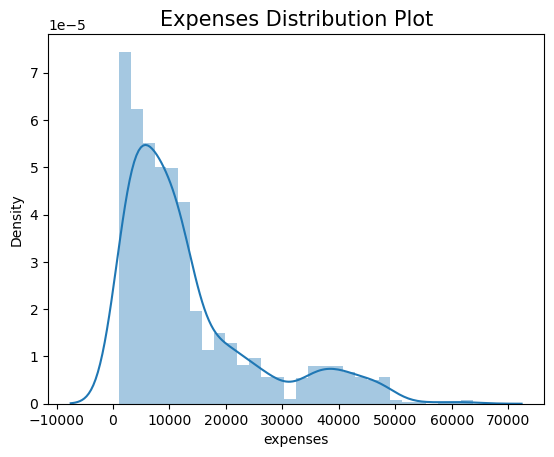

In [16]:
# We will first check the distribution of expenses by creating a distplot

sns.distplot(df_dummy.expenses)
plt.title("Expenses Distribution Plot",fontsize=15)
plt.show()

##### Data is randomly distributed, mostly people have their medical expenses below 30000, Small number of people have their medical expenses between 30000 to 50000

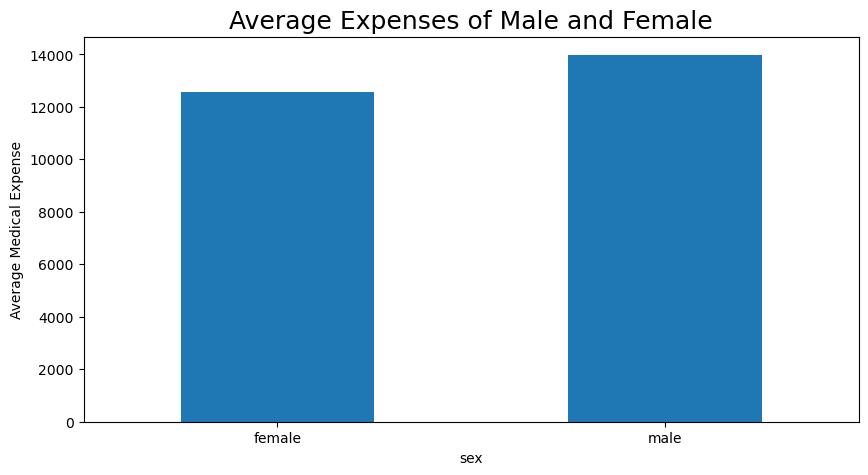

In [66]:
# Medical Expenses of male and female
plt.figure(figsize=(10,5))
df_cpy.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of Male and Female",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

#### Average medical expense of male is greater than females

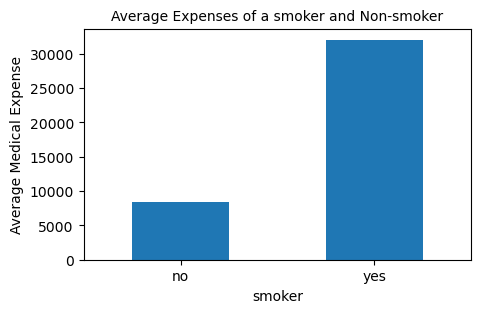

In [74]:
# Medical Expenses of Smoker
plt.figure(figsize=(5,3))
df_cpy.groupby(['smoker'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of a smoker and Non-smoker",fontsize=10)
plt.xticks(rotation = 0)
plt.show()

Medical Expense of an smoker is much more than a person who doesn't smoke

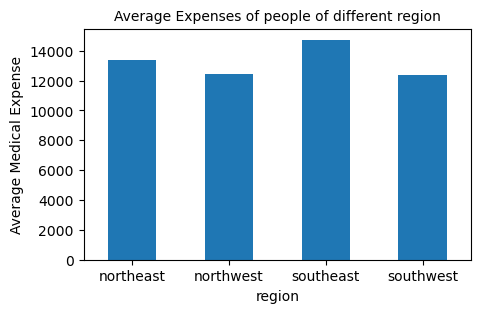

In [75]:
# Medical Expenses of region
plt.figure(figsize=(5,3))
df_cpy.groupby(['region'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of people of different region",fontsize=10)
plt.xticks(rotation = 0)
plt.show()

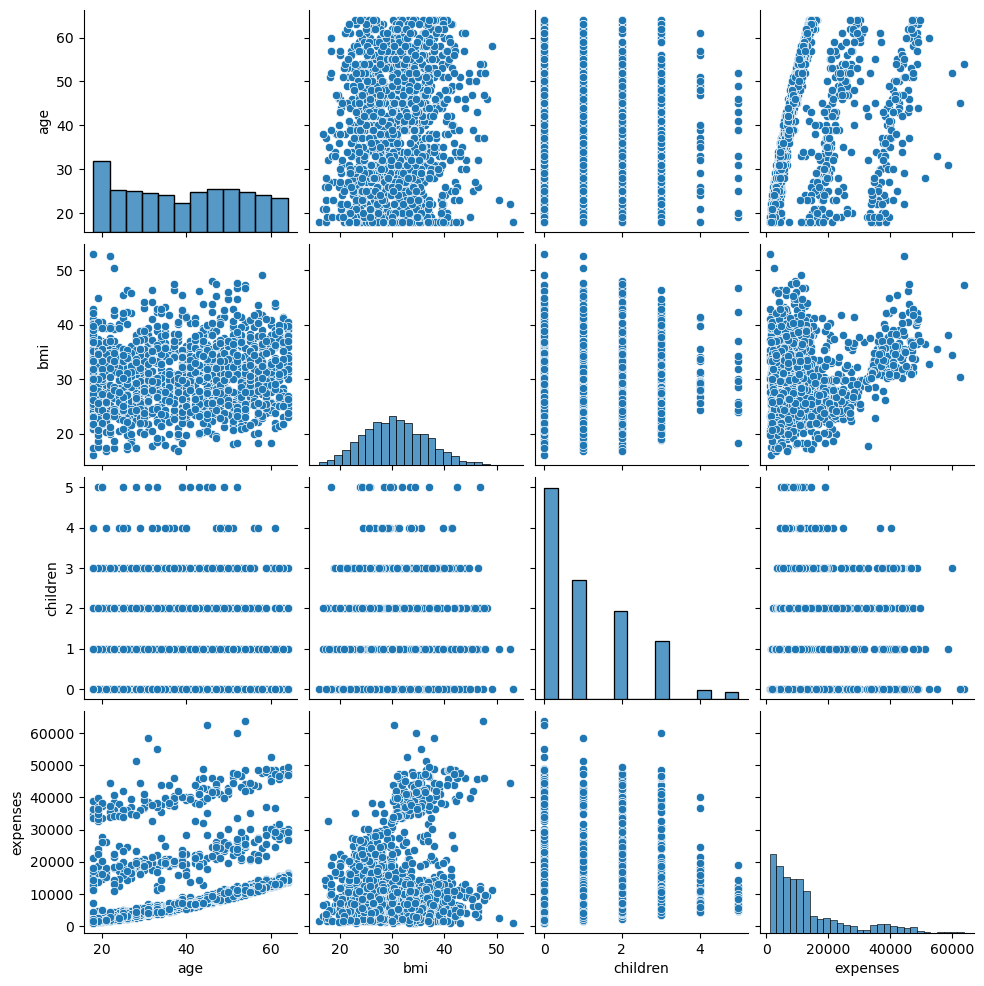

In [80]:
# Plot a pair plot
sns.pairplot(df_cpy)
plt.show()

<AxesSubplot:>

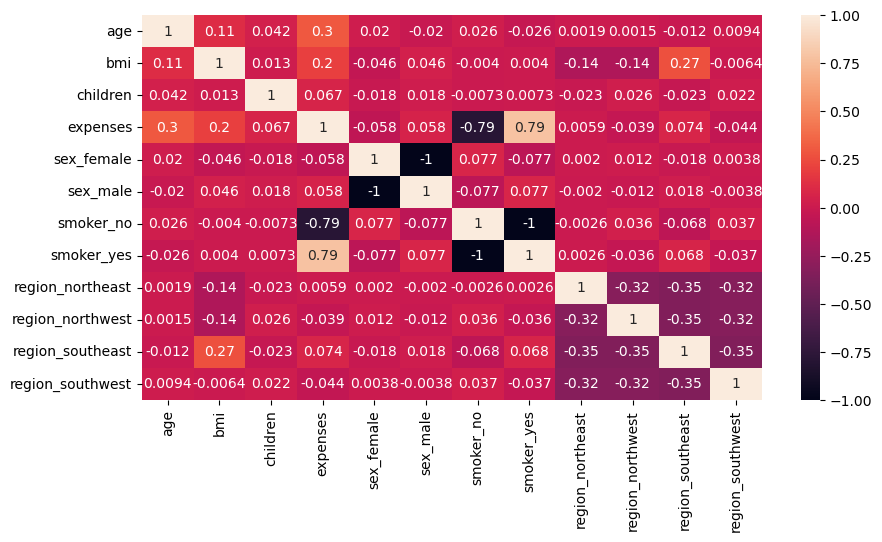

In [77]:
#visualize correlation coefficients using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_dummy.corr(),annot=True) 

There are no probable correlation between the various feature of our data. Only 'Smoker' feature has maximum correlation to the target

In [81]:
# at first let's create a copy of our data to use in model building
df_2 = df_dummy.copy()
df_2.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


In [84]:
# Seperating Dependent and Independent Variables

x=df_2.drop(["expenses"],axis=1)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0


In [86]:
y=df_2["expenses"]
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [92]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1127,35,35.9,2,1,0,1,0,0,0,1,0
1066,48,37.3,2,0,1,1,0,0,0,1,0
857,25,24.1,0,0,1,0,1,0,1,0,0
524,42,26.1,1,0,1,0,1,0,0,1,0
1009,51,27.7,1,0,1,1,0,1,0,0,0


In [93]:
x_train.shape

(935, 11)

In [94]:
x_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
313,49,35.9,0,0,1,1,0,0,0,1,0
629,44,39.0,0,1,0,0,1,0,1,0,0
29,31,36.3,2,0,1,0,1,0,0,0,1
770,61,36.1,3,0,1,1,0,0,0,0,1
529,18,25.5,0,0,1,1,0,1,0,0,0


In [96]:
x_test.shape

(402, 11)

In [101]:
print(y_train.shape)
print(y_test.shape)

(935,)
(402,)


In [7]:
df_dummy["bmi_category"] = pd.cut(
                df_dummy["bmi"],
                bins = [0.0, 20.0, 30.0, 40.0, 50.0, np.inf],
                labels = [1,2,3,4,5])

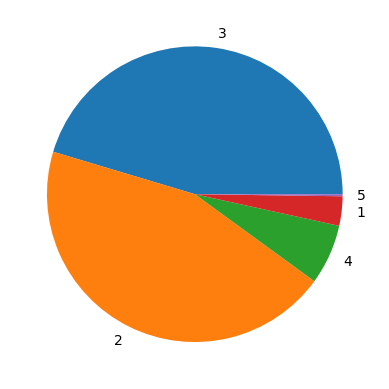

In [8]:
plt.pie(df_dummy.bmi_category.value_counts(),labels=df_dummy.bmi_category.value_counts().index)
plt.show()


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)   
for train_index,test_index in split.split(df_dummy, df_dummy["bmi_category"]):

    strat_train_set = df_dummy.loc[train_index].drop(["bmi_category"],axis=1)
    strat_test_set = df_dummy.loc[test_index].drop(["bmi_category"],axis=1)

In [10]:
train_index=df_dummy.loc[train_index]
train_index.shape

(1070, 13)

In [11]:
test_index=df_dummy.loc[test_index]
test_index.shape

(268, 13)

c:\Users\VINAYAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


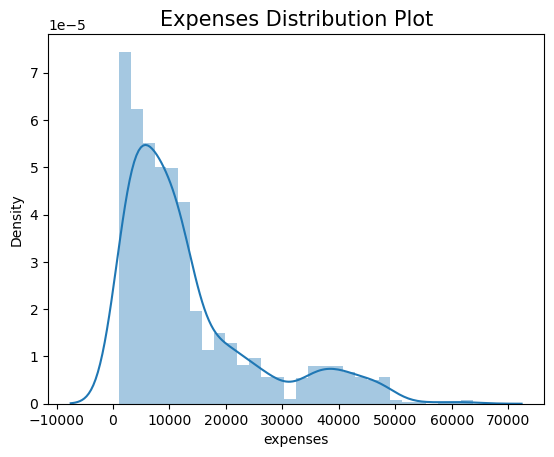

In [17]:
#distribution of expenses by creating a distplot with df_dummy dataset

sns.distplot(df_dummy.expenses)
plt.title("Expenses Distribution Plot",fontsize=15)
plt.show()

c:\Users\VINAYAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


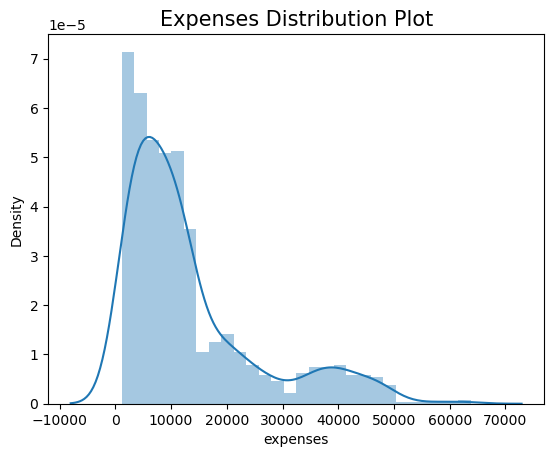

In [21]:
#distribution of expenses by creating a distplot with train dataset
sns.distplot(train_index.expenses)
plt.title("Expenses Distribution Plot",fontsize=15)
plt.show()

c:\Users\VINAYAK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


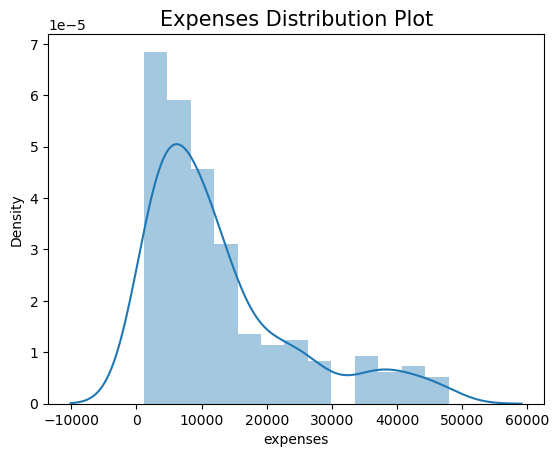

In [22]:
#distribution of expenses by creating a distplot with test dataset
sns.distplot(test_index.expenses)
plt.title("Expenses Distribution Plot",fontsize=15)
plt.show()

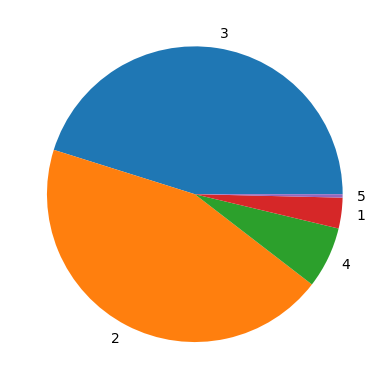

In [12]:
plt.pie(test_index.bmi_category.value_counts(),labels=test_index.bmi_category.value_counts().index)
plt.show()

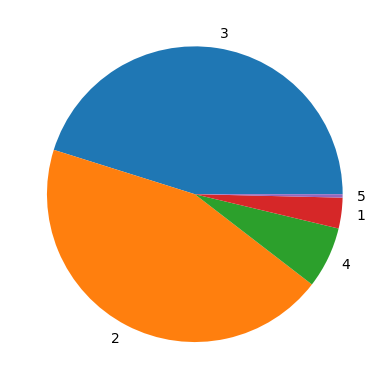

In [13]:
plt.pie(test_index.bmi_category.value_counts(),labels=test_index.bmi_category.value_counts().index)
plt.show()

### From above plots we can conclude that our data is splited properly.

In [44]:
x_train=strat_train_set.drop("expenses",axis=1)
x_test=strat_test_set.drop("expenses",axis=1)
y_train=strat_train_set['expenses']
y_test=strat_test_set['expenses']

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
regr = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=0)
regr.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [55]:
y_train_predicted=regr.predict(x_train)
y_test_predicted=regr.predict(x_test)

In [56]:
regr.score(x_train,y_train)

0.9775528060061555

In [57]:
regr.score(x_test,y_test)

0.8026051801930009

In [59]:
import xgboost as xgb

In [61]:
model = xgb.XGBRFRegressor()
model.fit(x_train, y_train)
print(model)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)


In [64]:
y_train_predicted=model.predict(x_train)
y_test_predicted=model.predict(x_test)

In [66]:
model.score(x_train,y_train)

0.9144086900829772

In [67]:
model.score(x_test,y_test)

0.8216550357820016

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37505206.936288334


In [69]:
lin_regressor.fit(x_train, y_train)

LinearRegression()

In [70]:
lin_regressor.score(x_train,y_train)

0.7564369419272547

In [71]:
lin_regressor.score(x_test,y_test)

0.7215214663841502